<a href="https://colab.research.google.com/github/belalE/Data-Science-Salaries-Analysis/blob/main/Data_Science_Salaries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Salaries


Columns
1.   work_year: The year the salary was paid.
2. experience_level: The experience level in the job during the year


*   EN, refers to Entry-level / Junior.
* MI, refers to Mid-level / Intermediate.
* SE, refers to Senior-level / Expert.
* EX, refers to Executive-level / Director.


3. employment_type: The type of employment for the role

* PT,refers to Part-time
* FT,refers to Full-time
* CT,refers to Contract
* FL,refers to Freelance

4. job_title: The role worked in during the year.
5. salary: The total gross salary amount paid.
6. salary_currency: The currency of the salary paid as an ISO 4217 currency code.
7. salaryinusd: The salary in USD
8. employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
9. remote_ratio: The overall amount of work done remotely
10. company_location: The country of the employer's main office or contracting branch
11. company_size: The median number of people that worked for the company during the year



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ds_salaries.csv")
data.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [4]:
list(data.columns)

['work_year',
 'experience_level',
 'employment_type',
 'job_title',
 'salary',
 'salary_currency',
 'salary_in_usd',
 'employee_residence',
 'remote_ratio',
 'company_location',
 'company_size']

In [5]:
data.drop(["salary","salary_currency"], axis=1, inplace=True)

In [6]:
data.describe(include="object")

,experience_level,employment_type,job_title,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755
unique,4,4,93,78,72,3
top,SE,FT,Data Engineer,US,US,M
freq,2516,3718,1040,3004,3040,3153


In [7]:
print("Rows:", data.shape[0])
print("Columns:", data.shape[1])

Rows: 3755
Columns: 9


## Distribution of salary based on different factors

### Distribution of salary

<Axes: xlabel='salary_in_usd', ylabel='Count'>

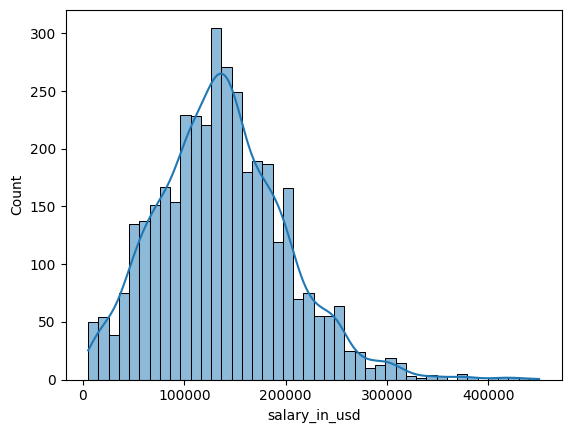

In [8]:
sns.histplot(data['salary_in_usd'], kde=True)

<ipython-input-9-b699050ce883>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True)


<Axes: >

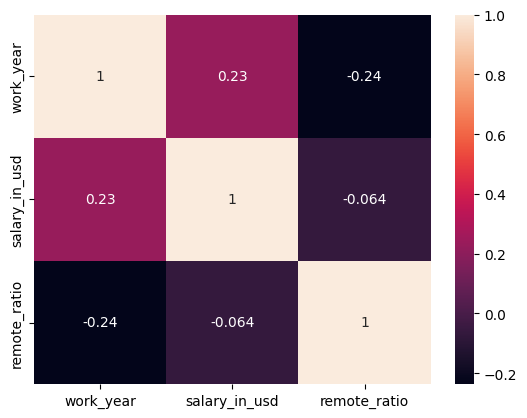

In [9]:
sns.heatmap(data.corr(), annot=True)

### Salary and work year

<Axes: xlabel='salary_in_usd', ylabel='Count'>

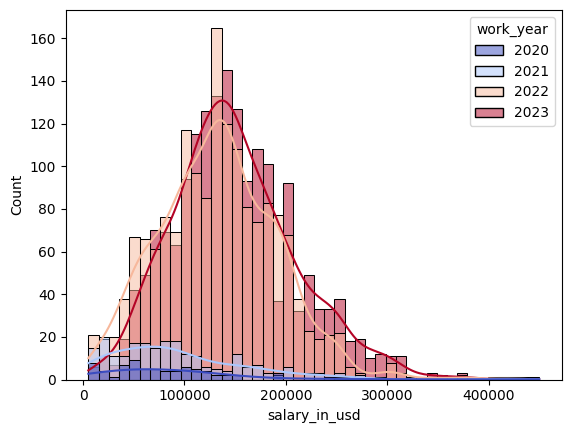

In [10]:
sns.histplot(x='salary_in_usd', data=data, hue="work_year", kde=True,  palette="coolwarm")

<Axes: title={'center': 'Growth of Data Science Salaries over time'}, xlabel='work_year', ylabel='salary_in_usd'>

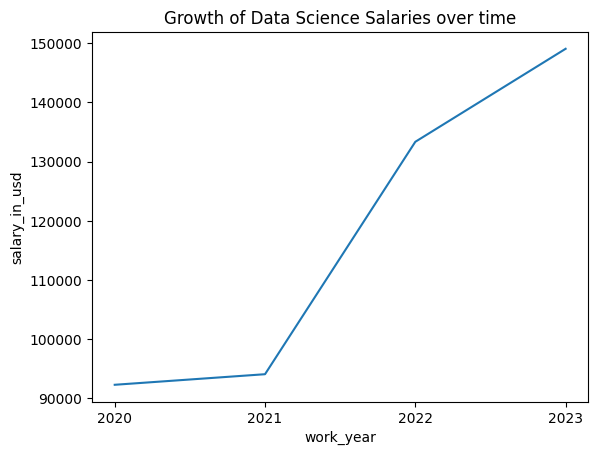

In [11]:

plt.title("Growth of Data Science Salaries over time")
salary_by_year = data['salary_in_usd'].groupby(data['work_year']).mean()
plt.xticks([2020,2021,2022,2023])
sns.lineplot(salary_by_year)

### Salary and employment type

In [12]:
salary_by_employment = data['salary_in_usd'].groupby(data['employment_type']).mean()
salary_by_employment

employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64

<Axes: title={'center': 'Data Science Salaries by Employment Type'}, ylabel='Salary in USD'>

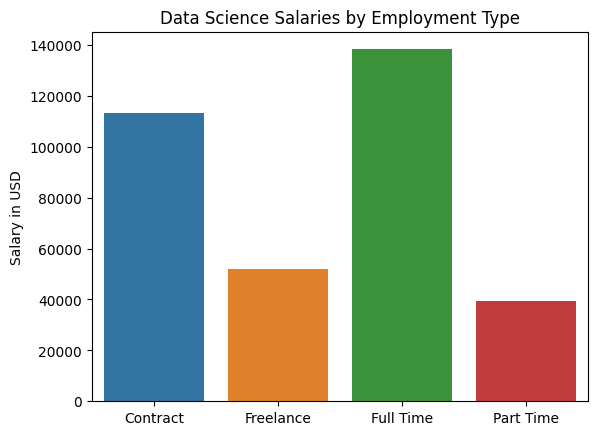

In [13]:
plt.title("Data Science Salaries by Employment Type")
plt.ylabel('Salary in USD')
sns.barplot(x=['Contract','Freelance','Full Time','Part Time'],y=salary_by_employment.values)

<Axes: xlabel='salary_in_usd', ylabel='employment_type'>

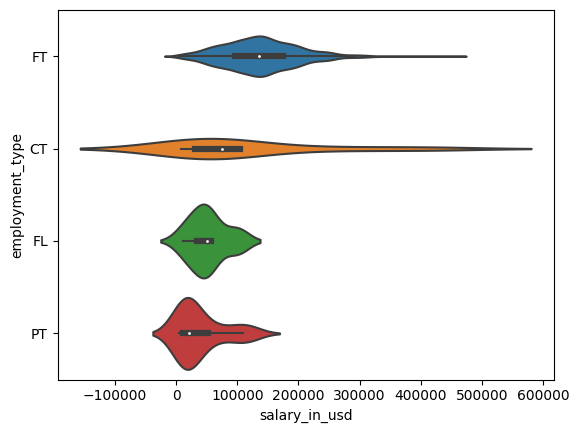

In [14]:
sns.violinplot(data=data, x='salary_in_usd',y='employment_type')

In [15]:
data['salary_in_usd'].groupby(data['employment_type']).describe()

,count,mean,std,min,25%,50%,75%,max
employment_type,,,,,,,,
CT,10.0,113446.900000,130176.746842,7500.0,30117.25,75000.0,103750.0,416000.0
FL,10.0,51807.800000,29458.879336,12000.0,34281.00,50000.0,57500.0,100000.0
FT,3718.0,138314.199570,62452.177613,5132.0,95599.00,135000.0,175075.0,450000.0
PT,17.0,39533.705882,38312.145181,5409.0,12000.00,21669.0,52533.0,125404.0


While full time work has the highest average pay, contract work has a larger spread, as evident by the larger standard deviation.

### Salary and Job Title

In [16]:
print(data['job_title'].nunique())

93


<Axes: title={'center': 'Top 25 Job Titles by Salary'}, xlabel='salary_in_usd', ylabel='job_title'>

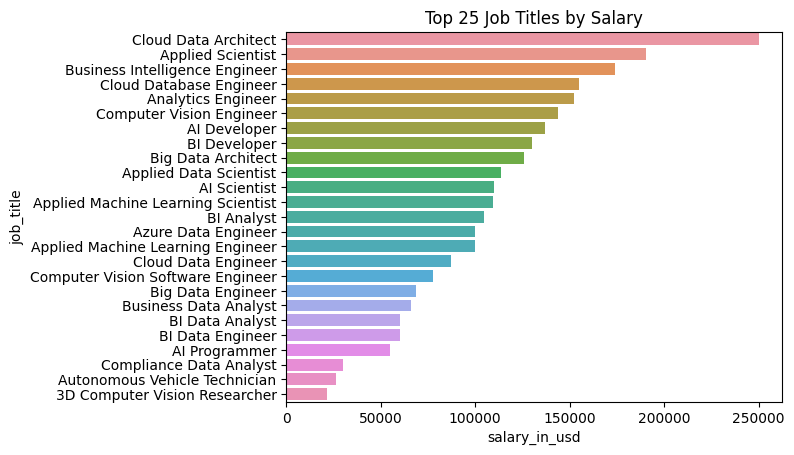

In [17]:
plt.title('Top 25 Job Titles by Salary')
job_titles_data = data[['job_title', 'salary_in_usd']]
job_titles_data = job_titles_data.groupby(job_titles_data['job_title']).mean().round(0).head(25).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='job_title',x='salary_in_usd',data=job_titles_data)

### Salary and Employee Residence


In [18]:
data['employee_residence'].nunique()

78

<Axes: title={'center': 'Top 15 Countries by Salary'}, xlabel='salary_in_usd', ylabel='employee_residence'>

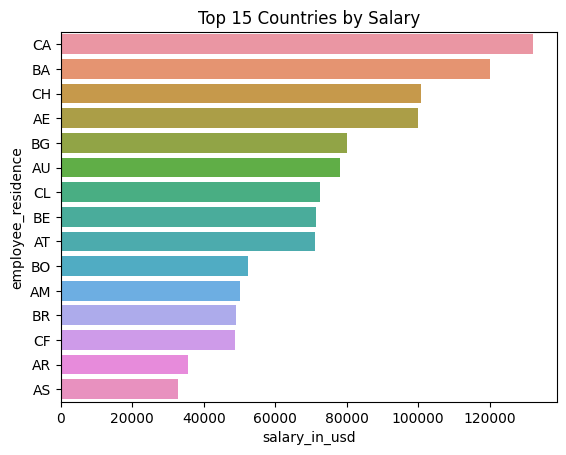

In [19]:
plt.title('Top 15 Countries by Salary')
countries_data = data[['employee_residence', 'salary_in_usd']]
countries_data = countries_data.groupby(countries_data['employee_residence']).mean().round(0).head(15).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='employee_residence',x='salary_in_usd',data=countries_data)

In [20]:
import plotly.graph_objects as go

In [21]:
pip install pycountry-convert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 17.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.7/228.7 kB 21.0 MB/s eta 0:00:00
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681832 sha256=abc4e5e728e0ffe300010a2afefad580ad4c6f39879eb6ed5c240521f43db188
  Stored in directory: /root/.cache/pip/wheels/03/57/cc/290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


In [22]:
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3

data['employee_residence_3'] = data.employee_residence.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
data['employee_residence_name'] = data.employee_residence.apply(lambda x: country_alpha2_to_country_name(x))

In [23]:
countries_data = data[['employee_residence_3', 'salary_in_usd','employee_residence_name']]
countries_data = countries_data.groupby(countries_data['employee_residence_3']).mean(numeric_only=True).round(0).sort_values('salary_in_usd',ascending = False).reset_index()
map_data =dict(
        type = 'choropleth',
        locations = countries_data['employee_residence_3'],
        z = countries_data['salary_in_usd'],
        # text = countries_data['employee_residence_name'],
        colorbar = {'title' : 'Salary in USD'},
      )
layout = dict(
    title = 'Mean Data Science Salary in USD',
    geo = dict(
        showframe = True,
        projection = {'type':'mercator'}
    )
)

In [24]:
choromap = go.Figure(data = [map_data],layout = layout)
choromap.show()

### Salary and Remote Ratio

In [25]:
data['remote_ratio']

0       100
1       100
2       100
3       100
4       100
       ... 
3750    100
3751    100
3752    100
3753    100
3754     50
Name: remote_ratio, Length: 3755, dtype: int64

<Axes: xlabel='remote_ratio', ylabel='salary_in_usd'>

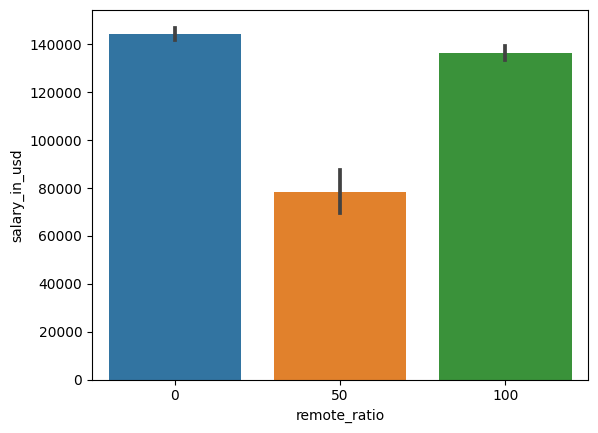

In [26]:
sns.barplot(x='remote_ratio',y='salary_in_usd',data=data)

Both in person employees (0% remote) and fully remote employees (100%) have a higher salary on average than hybrid data scientists.

### Salary and Company Location

<Axes: title={'center': 'Top 15 Countries by Salary'}, xlabel='salary_in_usd', ylabel='company_location'>

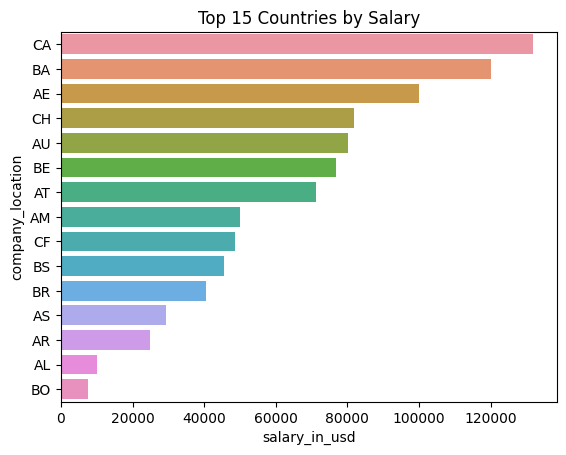

In [27]:
plt.title('Top 15 Countries by Salary')
companies_data = data[['company_location', 'salary_in_usd']]
companies_data = companies_data.groupby(companies_data['company_location']).mean().round(0).head(15).sort_values('salary_in_usd',ascending = False).reset_index()
sns.barplot(y='company_location',x='salary_in_usd',data=companies_data)

In [28]:
data['company_location_3'] = data.company_location.apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
data['company_location_name'] = data.company_location.apply(lambda x: country_alpha2_to_country_name(x))

In [29]:
locations_data = data[['company_location_3', 'salary_in_usd','company_location_name']]
locations_data = locations_data.groupby(locations_data['company_location_3']).mean(numeric_only=True).round(0).sort_values('salary_in_usd',ascending = False).reset_index()
company_map_data =dict(
        type = 'choropleth',
        locations = locations_data['company_location_3'],
        z = locations_data['salary_in_usd'],
        # text = locations_data['company_location_name'],
        colorbar = {'title' : 'Salary in USD'},
      )
location_layout = dict(
    title = 'Mean Data Science Salary in USD',
    geo = dict(
        showframe = True,
        projection = {'type':'mercator'}
    )
)

In [30]:
company_choromap = go.Figure(data = [company_map_data],layout = layout)
company_choromap.show()

### Salary and Company Size

<Axes: xlabel='company_size', ylabel='salary_in_usd'>

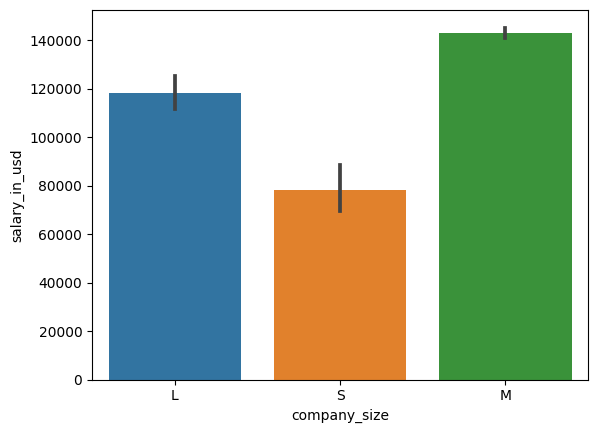

In [31]:
sns.barplot(x='company_size',y='salary_in_usd',data=data)

# Data Science Salary Regression Model

## Linear Regression

### Prepping Data

In [32]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [33]:
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,...,company_location_name_Spain,company_location_name_Sweden,company_location_name_Switzerland,company_location_name_Thailand,company_location_name_Turkey,company_location_name_Ukraine,company_location_name_United Arab Emirates,company_location_name_United Kingdom,company_location_name_United States,company_location_name_Viet Nam
0,2023,100,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Train Test Split

In [34]:
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)
X.head()

,work_year,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,...,company_location_name_Spain,company_location_name_Sweden,company_location_name_Switzerland,company_location_name_Thailand,company_location_name_Turkey,company_location_name_Ukraine,company_location_name_United Arab Emirates,company_location_name_United Kingdom,company_location_name_United States,company_location_name_Viet Nam
0,2023,100,0,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2023,100,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,100,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training Model

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

### Model Evaluation

In [38]:
print(lm.intercept_)

-171759939671161.34


In [39]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

<Axes: >

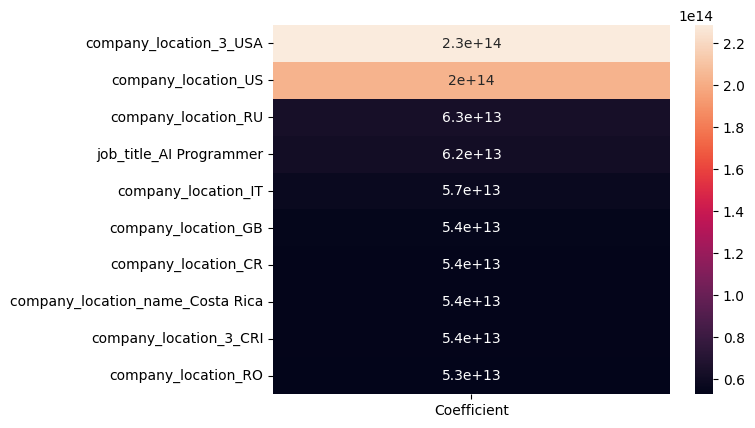

In [40]:
sns.heatmap(coeff_df.sort_values(by='Coefficient', ascending=False).head(10), annot=True)

### Predictions from the Model

In [41]:
predictions = lm.predict(X_test)

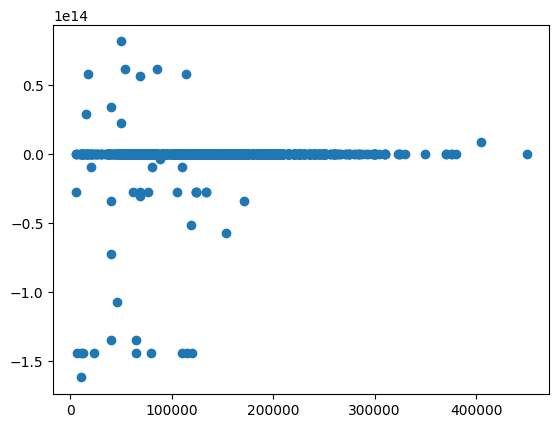

In [42]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

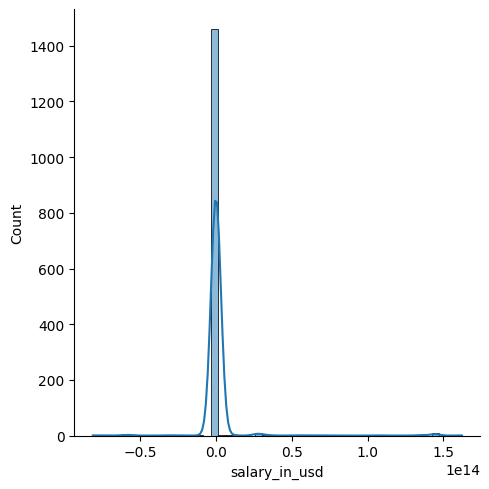

In [43]:
sns.displot((y_test-predictions),bins=50, kde=True);

In [44]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1925907044262.992
MSE: 2.0639162107914427e+26
RMSE: 14366336383335.324


## Decision Tree Regressor

### Prepping Data

In [45]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']

In [46]:
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

### Train Test Split

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Creating and Training Model

In [48]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

### Predictions from Model

In [49]:
y_pred = regressor.predict(X_test)

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 39214.17948794351
MSE: 2871625265.905841
RMSE: 53587.54767579723


In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

## Random Forest Regression

### Data Prep and Train Test Split

In [51]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Training Model

In [52]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 20, random_state = 101)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=101)

### Predictions from Model

In [53]:
y_pred = regressor.predict(X_test)

In [54]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 36478.24374751473
MSE: 2442762930.3218436
RMSE: 49424.315173018265


In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

## Support Vector Regression

Data Prep and Train Test Split

In [55]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

Training Model

In [56]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

SVR()

### Predictions from Model

In [57]:
y_pred = regressor.predict(X_test)
# y_pred = sc_y.inverse_transform(y_pred)

In [58]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 49224.40357208604
MSE: 4025343047.8710604
RMSE: 63445.591240613874


In [ ]:
plt.scatter(y_test,y_pred)
plt.plot(y_test,y_test,'r')

## Artificial Neural Network

### Prepping Data and Train Test Split

In [63]:
X = data.drop('salary_in_usd', axis=1)
y = data['salary_in_usd']
# Converting Categorical Variables to dummy variables
X = pd.get_dummies(data=X, drop_first=True)
# Filling in empty values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

#Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train.shape

(2253, 546)

In [65]:
X_test.shape

(1502, 546)

### Creating Model

In [66]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(546,activation='relu'))
model.add(Dense(365,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

### Training Model

In [ ]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600, verbose=0)

<Axes: >

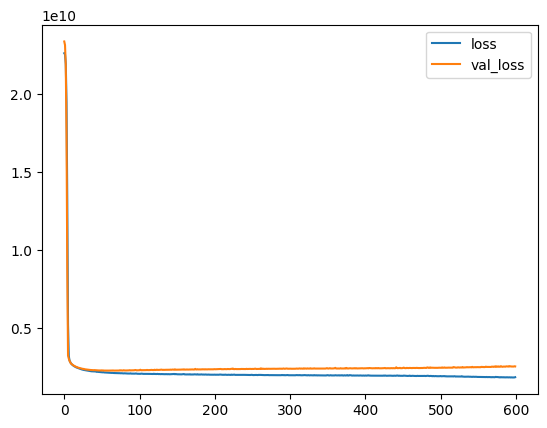

In [68]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [69]:
predictions = model.predict(X_test)

47/47 [==============================] - 1s 6ms/step


In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions ))
print('MSE:', metrics.mean_squared_error(y_test, predictions ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions )))

MAE: 37419.30361250015
MSE: 2532331515.2292943
RMSE: 50322.27653067073


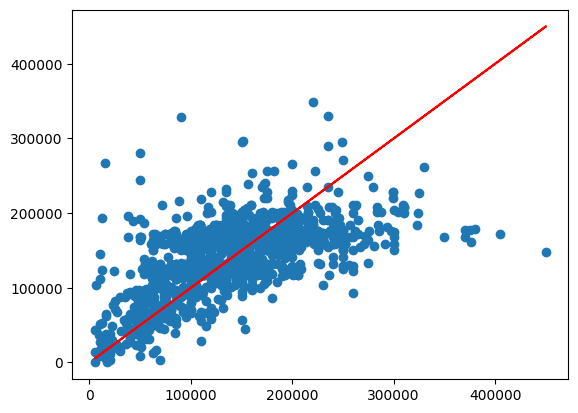

In [72]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

### Trying again with less epochs

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(546,activation='relu'))
model.add(Dense(365,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [82]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100, verbose=0)

Epoch 1/100
18/18 [==============================] - 3s 30ms/step - loss: 22590756864.0000 - val_loss: 23341176832.0000
Epoch 2/100
18/18 [==============================] - 0s 22ms/step - loss: 22506119168.0000 - val_loss: 23092412416.0000
Epoch 3/100
18/18 [==============================] - 0s 21ms/step - loss: 21855770624.0000 - val_loss: 21659496448.0000
Epoch 4/100
18/18 [==============================] - 0s 21ms/step - loss: 19176826880.0000 - val_loss: 16921304064.0000
Epoch 5/100
18/18 [==============================] - 0s 21ms/step - loss: 12463123456.0000 - val_loss: 8035090432.0000
Epoch 6/100
18/18 [==============================] - 0s 21ms/step - loss: 4719892480.0000 - val_loss: 3181956352.0000
Epoch 7/100
18/18 [==============================] - 0s 21ms/step - loss: 3215574784.0000 - val_loss: 2974007296.0000
Epoch 8/100
18/18 [==============================] - 0s 20ms/step - loss: 2890593536.0000 - val_loss: 2871166976.0000
Epoch 9/100
18/18 [============================

<Axes: >

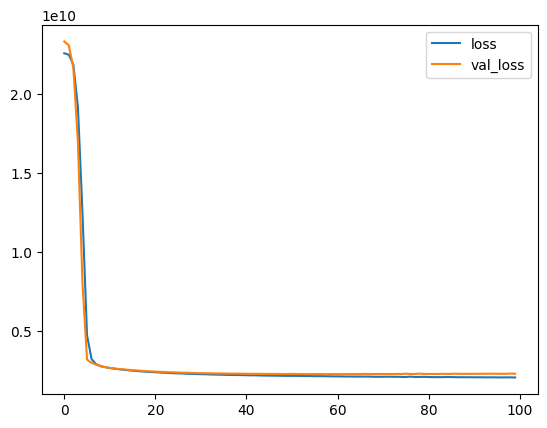

In [83]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [84]:
predictions = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions ))
print('MSE:', metrics.mean_squared_error(y_test, predictions ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions )))

47/47 [==============================] - 0s 4ms/step
MAE: 36349.542141788654
MSE: 2290696528.959233
RMSE: 47861.22155732376


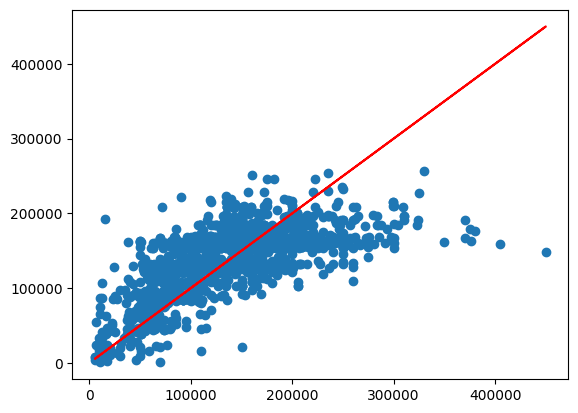

In [85]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

### Trying again with Early Stopping

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(546,activation='relu'))
model.add(Dense(365,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600, callbacks=[early_stopping], verbose=0)

<Axes: >

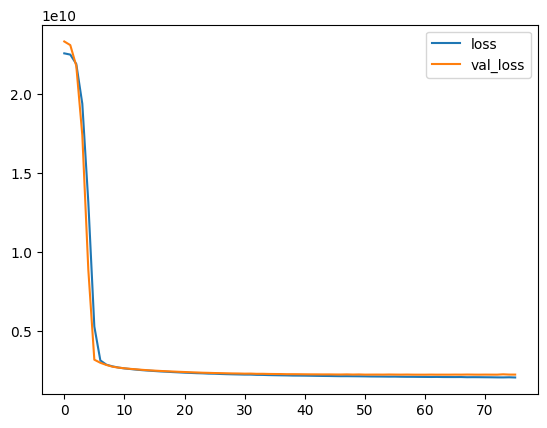

In [89]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [90]:
predictions = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions ))
print('MSE:', metrics.mean_squared_error(y_test, predictions ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions )))

47/47 [==============================] - 1s 8ms/step
MAE: 36196.5379667117
MSE: 2268479075.634037
RMSE: 47628.55315495146


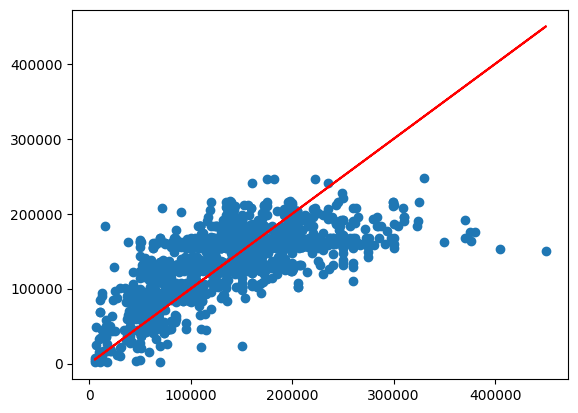

In [91]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

### Trying again with Early Stopping and Linear Activation

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(546,activation='linear'))
model.add(Dense(365,activation='linear'))
model.add(Dense(200,activation='linear'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [104]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600, callbacks=[early_stopping], verbose=0)

<Axes: >

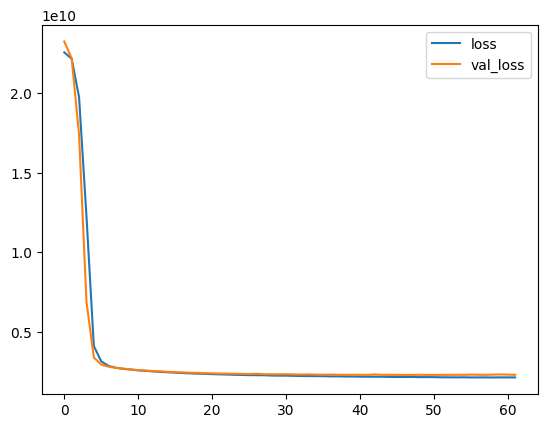

In [105]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [106]:
predictions = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions ))
print('MSE:', metrics.mean_squared_error(y_test, predictions ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions )))

47/47 [==============================] - 0s 3ms/step
MAE: 36288.62636922742
MSE: 2281184092.183782
RMSE: 47761.74297681966


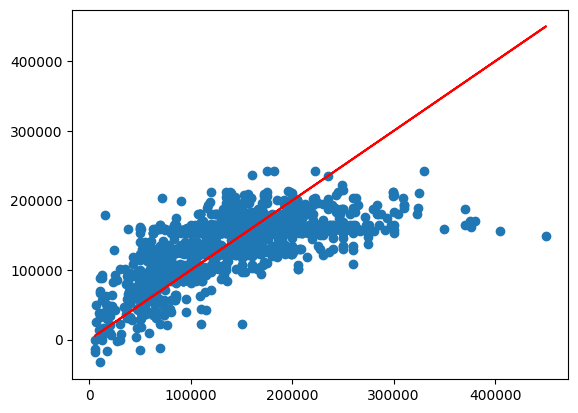

In [107]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

### Trying again with different hidden layers

In [114]:
model = Sequential()

model.add(Dense(546,activation='relu'))
model.add(Dense(365,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [115]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=600, callbacks=[early_stopping], verbose=0)

<Axes: >

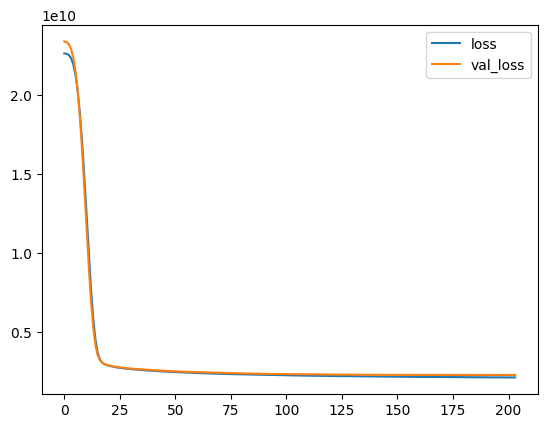

In [116]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [117]:
predictions = model.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions ))
print('MSE:', metrics.mean_squared_error(y_test, predictions ))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions )))

47/47 [==============================] - 0s 3ms/step
MAE: 36136.23118318032
MSE: 2271651329.32829
RMSE: 47661.84353681978


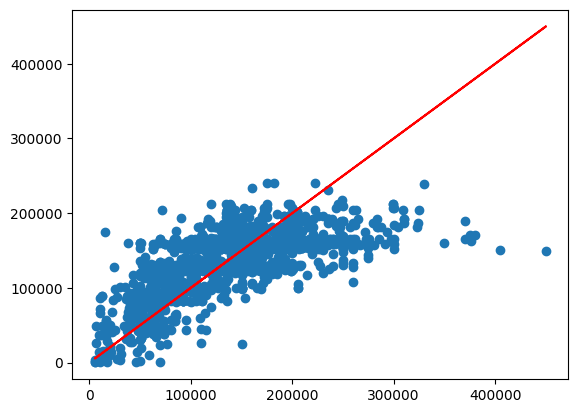

In [118]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

**Conclusion:**
 * The Linear Regression model failed to accurately predict data, as evident by the extremely high root mean squared error (RMSE), most likely due to lack of linearity of the data and the number of categorical variables.
 * The Decision Tree Model performed significantly better than the Linear Regresson Model, with a RMSE of approximately 54,000. This is likely because the Decision Tree is more adapted to dealing with categorical data that is not linear.
 * The Random Forest Model was the best of the regression models, with a RMSE of 49,000. The randomness that the forest provided may have prevented overfitting to the training data and allowed for better predictions.
 * The Support Vector Model was better than the Linear Regression Models but worse than the Decision Tree and Random Forest Models. The SVM may have performed better with scaled and standardized data.
 * The Artificial Neural Networks performed similarly to the Random Forest model. Even with adjustments to the number of epochs, the activation function, and the hidden layers, the ANN had a RMSE of 49,000, slightly beating the Random Forest Model.
 * The best models had a RMSE of 49,000, corresponding to an error of $49,000 during salary prediction. This high error is perhaps the result of high variance in data science salaries, even in the same conditions (same experience level, country, and work year). Also, the categorical nature of the data, especially with the large variety of countries and job titles, made training a model difficult. If the data had been more standardized and formatted, the models may have performed better.